# Importando libs



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q rasterio
!pip install -q spectral

     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 212 kB 7.8 MB/s 


In [ ]:
# Comando para padronizar o tamanho de todas as figuras
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas 
import rasterio as rio
from rasterio.plot import show
from spectral import imshow
import numpy as np
import matplotlib.pyplot as plt
import glob

# Organizando Bandas

In [ ]:
bandas = sorted(glob.glob('/content/drive/MyDrive/PDI/*.tiff'))
print(bandas)

['/content/drive/MyDrive/PDI/2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff', '/content/drive/MyDrive/PDI/2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff', '/content/drive/MyDrive/PDI/2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B04_(Raw).tiff', '/content/drive/MyDrive/PDI/2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff']


In [ ]:
bandas[0]

'/content/drive/MyDrive/PDI/2021-01-01-00_00_2021-01-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff'

# Empilhamento

In [ ]:
# Lendo metadado do primeiro arquivo
with rio.open(bandas[0]) as src0:
  meta = src0.meta

In [ ]:
meta['transform'] = Affine(8.986771472392154e-05, 0.0, 659039,9764274352, 0.0, -8.504963819971935e-05, 7916071,962909932)

In [ ]:
# Atualizando número de bandas do metadado
meta.update(count=len(bandas))

In [ ]:
# Escrevendo stack em disco
with rio.open('stack.tif', 'w', **meta) as dst:
  for id, arquivo in enumerate(bandas, start=1):
    with rio.open(arquivo) as scr1:
      dst.write_band(id, scr1.read(1))

# Visualizando

In [ ]:
# Lendo arquivo
stack = rio.open('stack.tif')
b1 = stack.read(1)
b2 = stack.read(2)
b3 = stack.read(3)
b4 = stack.read(4)

In [ ]:
# Criando stack numpy
array_stack = np.dstack([b1,b2,b3,b4])

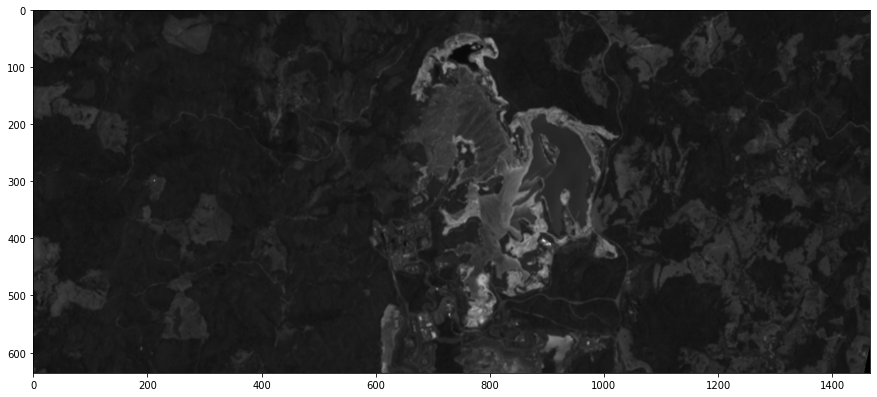

In [ ]:
# Visualizando imagem original
show(stack.read(4), cmap='gray')

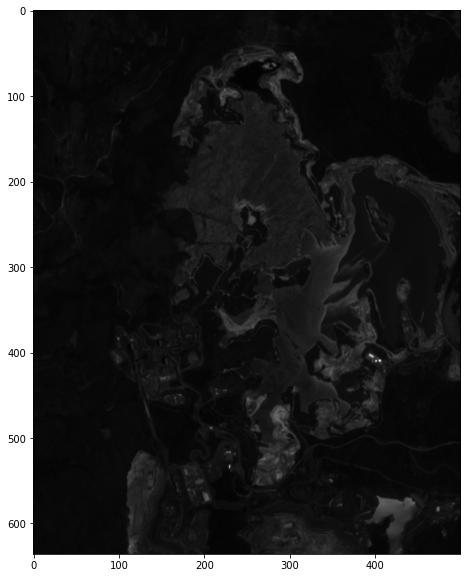

In [ ]:
plt.imshow(b2[0: 1600, 500:1000], cmap='gray')

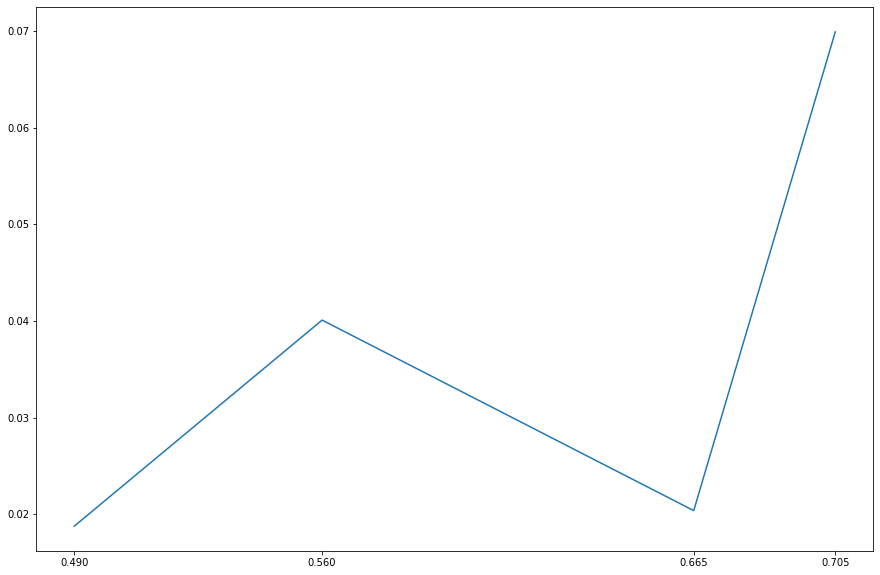

In [ ]:
# Visualizando espectro
x = [0.490, 0.560, 0.665, 0.705]
plt.plot(x, array_stack[300,420,:])
plt.xticks(x)
plt.show()

In [ ]:
!mv stack.tif 

mv: missing destination file operand after 'stack.tif'
Try 'mv --help' for more information.


In [ ]:
src = rio.open('/content/drive/MyDrive/PDI/stack.tif')

In [ ]:
from pandas import Dataframe

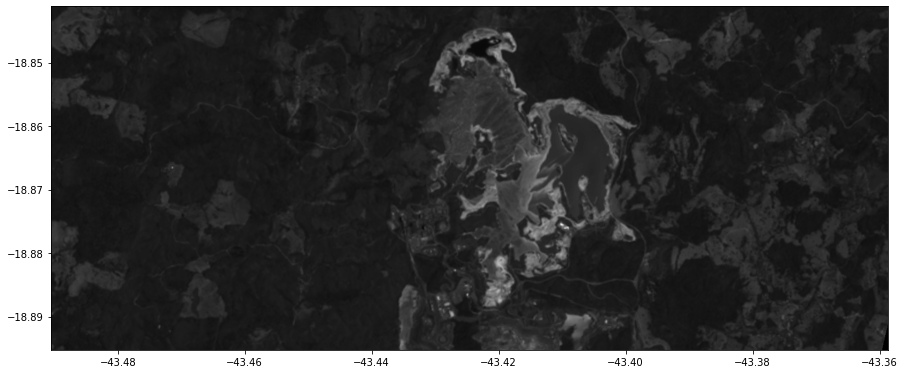

In [ ]:
show(src.read(4), cmap='gray', transform=src.transform)

In [ ]:
from spectral import imshow
import tifffile as tif

In [ ]:
# Leitura do arquivo da imagem
img = tif.imread('/content/drive/MyDrive/PDI/stack.tif')

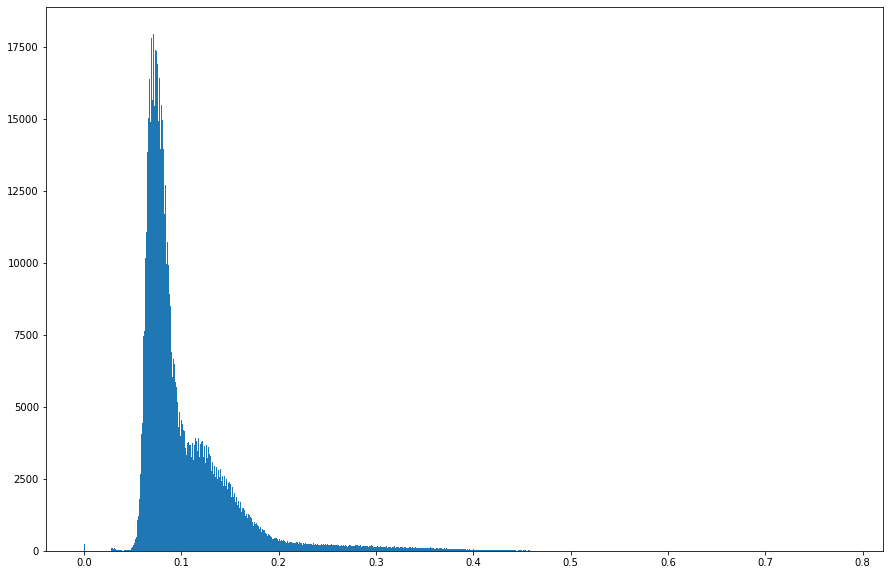

In [ ]:
# Visualizando o histograma
plt.hist(img[:,:,3].flatten(), bins=1024)
plt.show()

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.01590000092983246, 0.24379999935626984]
    G: [0.05979999899864197, 0.27970001101493835]
    B: [0.014600000344216824, 0.11729999631643295]

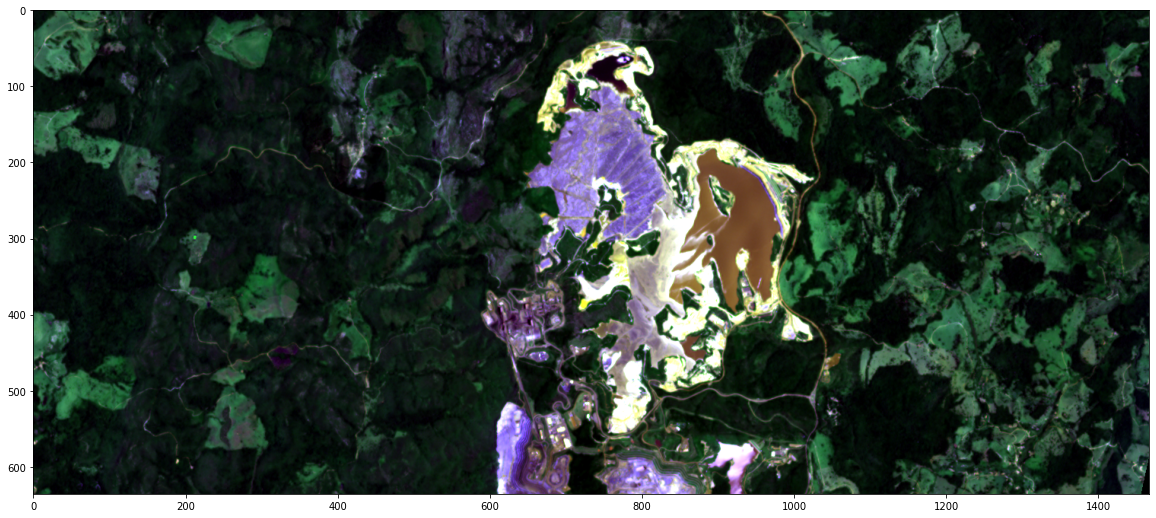

In [ ]:
# Composição Colorida
imshow(img,(2,3,0),stretch=(0.02, 0.98),figsize=(20,15))

In [4]:
!which python

/usr/local/bin/python


In [5]:
!python --version

Python 3.7.13


In [6]:
!echo $PYTHONPATH

/env/python


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [8]:
!which conda

/usr/local/bin/conda


In [9]:
!conda --version

conda 4.5.4


In [14]:
import sys
sys.path.append("/usr/local/lib/python3.6/site-packages")